Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
url = "/EasyVisa.csv"
easy_visa_data = pd.read_csv(url)
easy_visa_data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [ ]:
easy_visa_data.shape

(25480, 12)

In [ ]:
easy_visa_data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
easy_visa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Does education play a role in Visa certification?

In [ ]:
#number of people that got certified and denied by education level
education_status = easy_visa_data.groupby(['education_of_employee', 'case_status']).size().unstack(fill_value=0)
print(education_status)

case_status            Certified  Denied
education_of_employee                   
Bachelor's                  6367    3867
Doctorate                   1912     280
High School                 1164    2256
Master's                    7575    2059


Graph for number of denied visas by education level

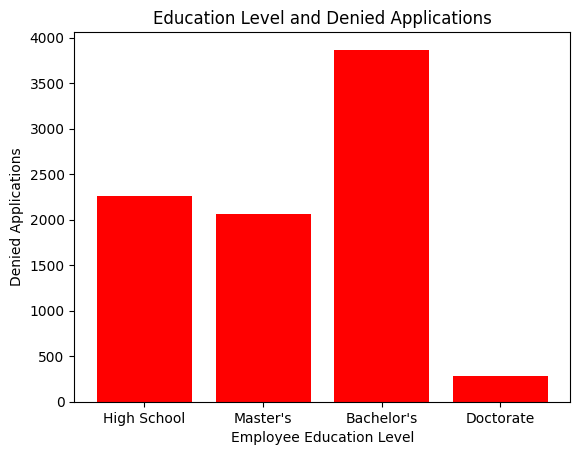

In [ ]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4]

# heights of bars
height = [2256, 2059, 3867, 280]

# labels for bars
tick_label = ['High School', "Master's", "Bachelor's", "Doctorate"]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red'])

# naming the x-axis
plt.xlabel('Employee Education Level')
# naming the y-axis
plt.ylabel('Denied Applications')
# plot title
plt.title('Education Level and Denied Applications')

# function to show the plot
plt.show()

People with a Doctorate degree got the least amount of denied visa applications

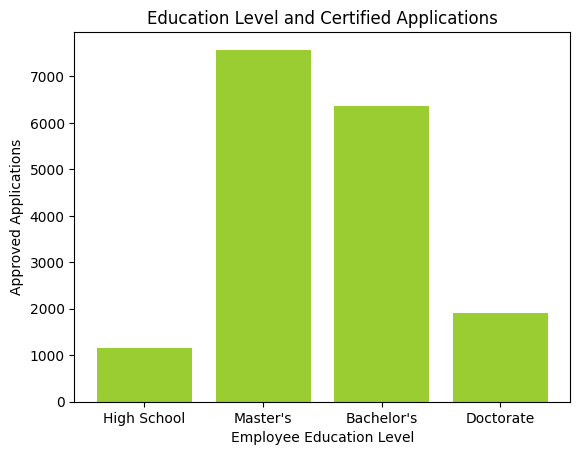

In [ ]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4]

# heights of bars
height = [1164,7575,6367,1912]

# labels for bars
tick_label = ['High School', "Master's", "Bachelor's", "Doctorate"]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['yellowgreen'])

# naming the x-axis
plt.xlabel('Employee Education Level')
# naming the y-axis
plt.ylabel('Approved Applications')
# plot title
plt.title('Education Level and Certified Applications')

# function to show the plot
plt.show()

People with a Master's degree got the highest amount of accepted visa applications followed by a Bachelor's degree

How does the visa status vary across different continents?

In [ ]:
#People that got a certified or denied visa grouped by continent
continent_status = easy_visa_data.groupby(['continent', 'case_status']).size().unstack(fill_value=0)
print(continent_status)

case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359


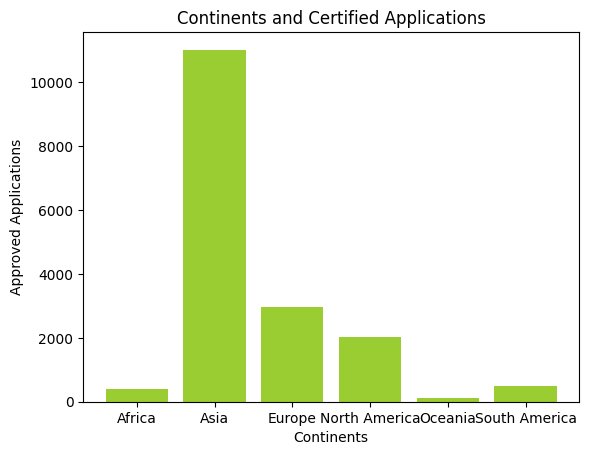

In [ ]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5, 6]

# heights of bars
height = [397,11012, 2957, 2037, 122, 493]

# labels for bars
tick_label = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['yellowgreen'])

# naming the x-axis
plt.xlabel('Continents')
# naming the y-axis
plt.ylabel('Approved Applications')
# plot title
plt.title('Continents and Certified Applications')

# function to show the plot
plt.show()

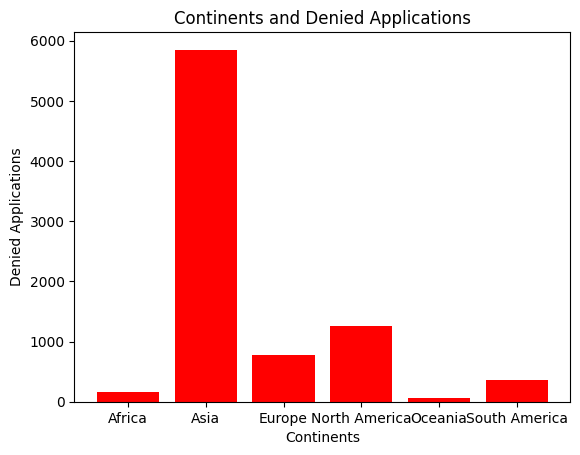

In [ ]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5, 6]

# heights of bars
height = [154, 5849, 775, 1255,70, 359]

# labels for bars
tick_label = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red'])

# naming the x-axis
plt.xlabel('Continents')
# naming the y-axis
plt.ylabel('Denied Applications')
# plot title
plt.title('Continents and Denied Applications')

# function to show the plot
plt.show()

Asia is the continent that has the most certified and denied applications, but they are also the continent with the most applications. However, only roughly 65% of people that apply from Asia get certified applications, 79% of European applications, and South America having the lowest percentage of 56% of approved applications out of all the people that applied.

Does work experience influence visa status?

In [ ]:
#number of people that got certified and denied by work experience
job_experience_status = easy_visa_data.groupby(['has_job_experience', 'case_status']).size().unstack(fill_value=0)
print(job_experience_status)

case_status         Certified  Denied
has_job_experience                   
N                        5994    4684
Y                       11024    3778


 56% of people with no work experience who applied got certified
 vs
 75% of people with work experience who applied got certified

 44% of people with no work experience that applied got denied
 vs
 26% of people with work experience that applied got denied

 What can we notice? People with work experience have MORE certified applications and LESS denied applications

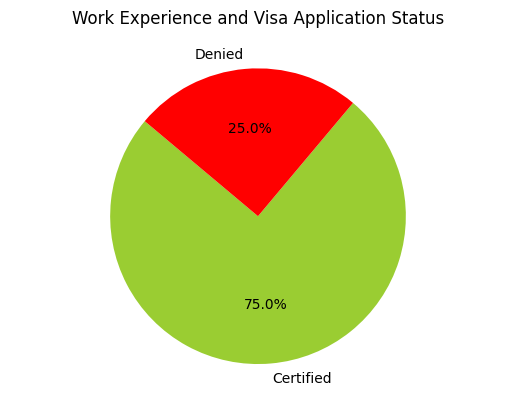

In [ ]:
# Data
labels = ['Certified', 'Denied']
sizes = [75,25]

# Customize the chart
plt.title('Work Experience and Visa Application Status')
plt.axis('equal')
colors = ['yellowgreen', 'red']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Display the chart
plt.show()

How does the visa status change with the prevailing wage?

In [ ]:
#number of people that got certified and denied by wage
average_wage_certified = easy_visa_data[easy_visa_data['case_status'] == 'Certified']['prevailing_wage'].mean()

print(f"Average prevailing wage for certified applications: ${average_wage_certified:.2f}")

average_wage_certified = easy_visa_data[easy_visa_data['case_status'] == 'Denied']['prevailing_wage'].mean()

print(f"Average prevailing wage for denied applications: ${average_wage_certified:.2f}")


Average prevailing wage for certified applications: $77293.62
Average prevailing wage for denied applications: $68748.68


People with certified applications seem to have higher average wage.

In [ ]:
#creating cateogrical values for objects
for feature in easy_visa_data.columns:
    if easy_visa_data[feature].dtype == 'object':
        easy_visa_data[feature] = pd.Categorical(easy_visa_data[feature])
easy_visa_data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [ ]:
print(easy_visa_data.continent.value_counts())
print(easy_visa_data.education_of_employee.value_counts())
print(easy_visa_data.has_job_experience.value_counts())
print(easy_visa_data.requires_job_training.value_counts())
print(easy_visa_data.region_of_employment.value_counts())
print(easy_visa_data.unit_of_wage.value_counts())
print(easy_visa_data.case_status.value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [ ]:
#replace structure with dictionaries and add dummies
replaceStruct = {
                    "has_job_experience": {"Y":1, "N":2},
                    "requires_job_training": {"Y":1, "N":2},
                    "case_status": {"Certified":1, "Denied":2},
                    "full_time_position": {"Y":1, "N":2}
}
oneHotcols = ["continent", "education_of_employee", "region_of_employment", "unit_of_wage"]

In [ ]:
easy_visa_data= easy_visa_data.replace(replaceStruct)
easy_visa_data = pd.get_dummies(easy_visa_data, columns= oneHotcols)
easy_visa_data.head(10)

,case_id,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,continent_Africa,continent_Asia,...,education_of_employee_Master's,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,EZYV01,2,2,14513,2007,592.2029,1,2,0,1,...,0,0,0,0,0,1,1,0,0,0
1,EZYV02,1,2,2412,2002,83425.6500,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
2,EZYV03,2,1,44444,2008,122996.8600,1,2,0,1,...,0,0,0,0,0,1,0,0,0,1
3,EZYV04,2,2,98,1897,83434.0300,1,2,0,1,...,0,0,0,0,0,1,0,0,0,1
4,EZYV05,1,2,1082,2005,149907.3900,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
5,EZYV06,1,2,2339,2012,78252.1400,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
6,EZYV07,2,2,4985,1994,53635.3900,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
7,EZYV08,1,2,3035,1924,418.2298,1,2,0,0,...,0,0,0,0,0,1,1,0,0,0
8,EZYV09,2,2,4810,2012,74362.1900,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
9,EZYV10,1,2,2251,1995,67514.7600,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
easy_visa_data['has_job_experience'] = easy_visa_data['has_job_experience'].astype(int)
easy_visa_data['case_status'] = easy_visa_data['case_status'].astype(int)
easy_visa_data['requires_job_training'] = easy_visa_data['requires_job_training'].astype(int)
easy_visa_data['full_time_position'] = easy_visa_data['full_time_position'].astype(int)
easy_visa_data.drop(columns=["case_id"], inplace=True)

In [ ]:
easy_visa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   no_of_employees                    25480 non-null  int64  
 3   yr_of_estab                        25480 non-null  int64  
 4   prevailing_wage                    25480 non-null  float64
 5   full_time_position                 25480 non-null  int64  
 6   case_status                        25480 non-null  int64  
 7   continent_Africa                   25480 non-null  uint8  
 8   continent_Asia                     25480 non-null  uint8  
 9   continent_Europe                   25480 non-null  uint8  
 10  continent_North America            25480 non-null  uint8  
 11  continent_Oceania                  25480 non-null  uin

In [ ]:
easy_visa_data["case_status"].value_counts()

1    17018
2     8462
Name: case_status, dtype: int64

Split Data into Train and Test Sets

In [ ]:
X = easy_visa_data.drop("case_status", axis= 1)
y = easy_visa_data.pop("case_status")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state= 1, stratify= y)

Accuracy, Recall and Precision and Confusion Matrix

In [ ]:
#Confusion Matrix
def make_confusion_matrix(model, y_actual, labels=[1,0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Recall, Accuracy and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list

Building bagging and boosting models

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator= BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.977909845256784
Accuracy on test set :  0.7095761381475667
Recall on training set :  0.9966423235121296
Recall on test set :  0.8430950048971596
Precision on training set :  0.9710476813609226
Precision on test set :  0.7520531189935349


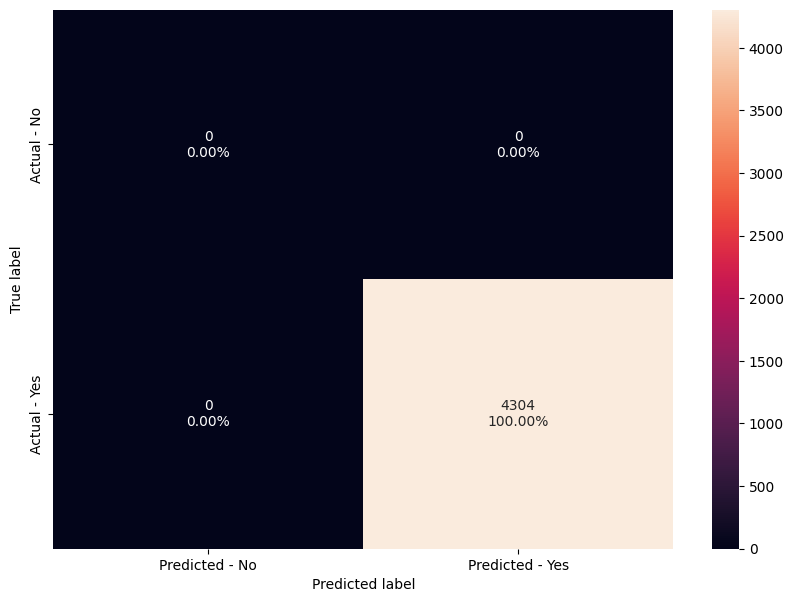

In [ ]:
make_confusion_matrix(bagging_estimator,y_test)

Confusion Matrix is showing 100% accuracy

RANDOM FORREST CLASSIFIER

In [ ]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.738487702773417
Recall on training set :  1.0
Recall on test set :  0.8523016650342801
Precision on training set :  1.0
Precision on test set :  0.7775196568977841


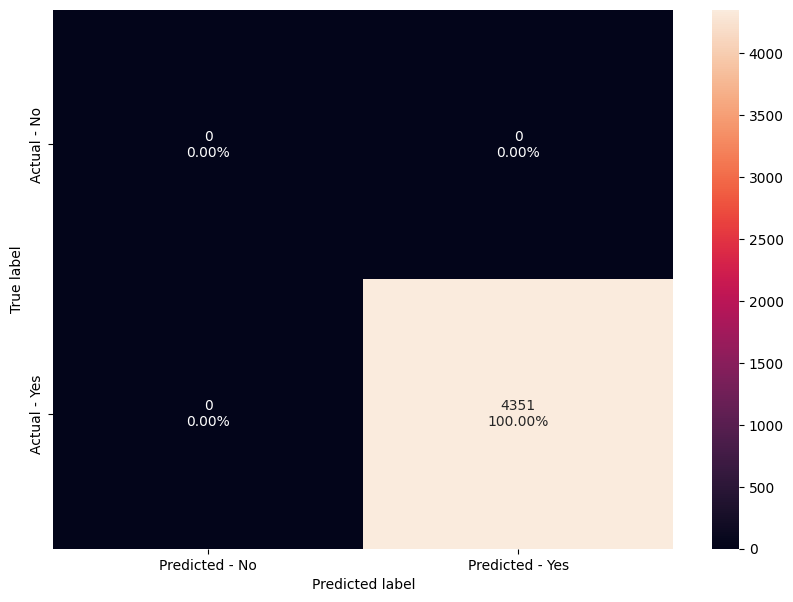

In [ ]:
make_confusion_matrix(rf_estimator,y_test)

-> In both cases, overfitting is indicated by the substantial difference between the training and test set performance metrics.

HYPERPARAMETER TUNING

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                  random_state=1)

In [ ]:
BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=40,
                  random_state=1)


BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=40,
                  random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6679188158779995
Precision on test set :  0.6678440607012036


The training and test sets seem to be consistent with each other in accuracy, recall, and precision

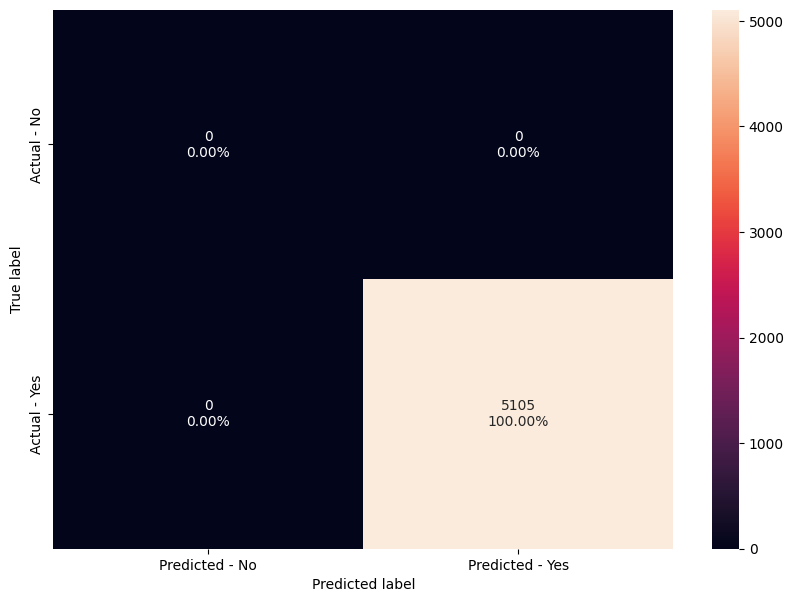

In [ ]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

Tuning Models

In [ ]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

In [ ]:
# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.3, min_samples_leaf=6,
                       n_estimators=150, random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.7644090603274277
Accuracy on test set :  0.7518315018315018
Recall on training set :  0.8855871736758163
Recall on test set :  0.8760039177277179
Precision on training set :  0.7879602658899096
Precision on test set :  0.7796373779637378
